# 최근접 이웃(K-Nearest Neighbor)

* 특별한 예측 모델 없이 가장 가까운 데이터 포인트를 기반으로 예측을 수행하는 방법
* 분류와 회귀 모두 지원

![k nearest neighbor](https://upload.wikimedia.org/wikipedia/commons/thumb/e/e7/KnnClassification.svg/220px-KnnClassification.svg.png)

In [1]:
import multiprocessing
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

plt.style.use(["seaborn-v0_8-whitegrid"])

In [18]:
from sklearn.neighbors import KNeighborsClassifier, KNeighborsRegressor
from sklearn.manifold import TSNE
from sklearn.datasets import load_iris, load_breast_cancer
from sklearn.datasets import load_diabetes, fetch_california_housing
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import make_pipeline, Pipeline

## K 최근접 이웃 분류

* 입력 데이터 포인트와 가장 가까운 k개의 훈련 데이터 포인트가 출력
* k개의 데이터 포인트 중 가장 많은 클래스가 예측 결과

### 붓꽃 데이터

In [9]:
X, y = load_iris(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=1231
)


In [10]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

In [11]:
model = KNeighborsClassifier()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.975
0.9666666666666667


In [12]:
model.fit(X_train_scaled, y_train)
print(model.score(X_train_scaled, y_train))
print(model.score(X_test_scaled, y_test))

0.95
0.9666666666666667


In [19]:
cross_validate(estimator=KNeighborsClassifier(), X=X, y=y, cv=5, verbose=True)


[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.
[Parallel(n_jobs=1)]: Done   5 out of   5 | elapsed:    0.0s finished


{'fit_time': array([0.00094509, 0.00022793, 0.00022817, 0.00019026, 0.00017905]),
 'score_time': array([0.00138783, 0.00065923, 0.00068808, 0.00058603, 0.00056505]),
 'test_score': array([0.96666667, 1.        , 0.93333333, 0.96666667, 1.        ])}

In [20]:
param_grid = [
    {
        "n_neighbors": [3, 5, 7],
        "weights": ["uniform", "distance"],
        "algorithm": ["ball_tree", "kd_tree", "brute"],
    }
]

gs = GridSearchCV(estimator=KNeighborsClassifier(), param_grid=param_grid, verbose=True)


In [21]:
gs.fit(X, y)

Fitting 5 folds for each of 18 candidates, totalling 90 fits


GridSearchCV(estimator=KNeighborsClassifier(),
             param_grid=[{'algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'n_neighbors': [3, 5, 7],
                          'weights': ['uniform', 'distance']}],
             verbose=True)

In [22]:
gs.best_estimator_

KNeighborsClassifier(algorithm='ball_tree', n_neighbors=7)

In [23]:
gs.best_score_

0.9800000000000001

In [44]:
def make_meshgrid(x, y, h=0.02):
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    return xx, yy


def plot_contours(clf, xx, yy, **params):
    z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    z = z.reshape(xx.shape)
    out = plt.contourf(xx, yy, z, **params)
    return out

In [45]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)

In [46]:
iris_comp_df = pd.DataFrame(data=X_comp)
iris_comp_df['target'] = y
iris_comp_df

,0,1,target
0,-23.954458,-4.301396,0
1,-26.704016,-5.191670,0
2,-26.470518,-4.005190,0
3,-26.966654,-4.374567,0
4,-23.944723,-4.475959,0
...,...,...,...
145,12.247624,-1.374797,2
146,10.390664,1.355582,2
147,11.714509,-0.631625,2
148,12.332129,-2.360798,2


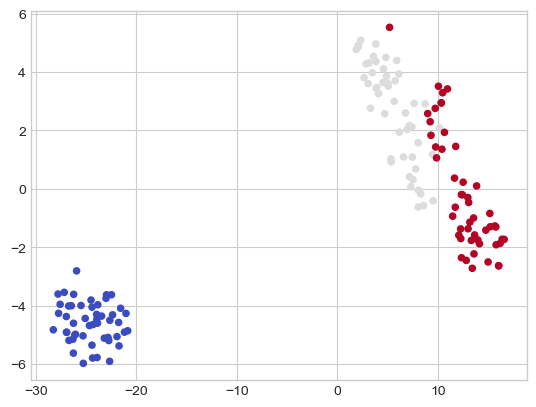

In [47]:
plt.scatter(iris_comp_df.iloc[:, 0], iris_comp_df.iloc[:, 1], c=y, s=20, cmap=plt.cm.coolwarm)

In [48]:
model = KNeighborsClassifier()
model.fit(X_comp, y)
predict = model.predict(X_comp)

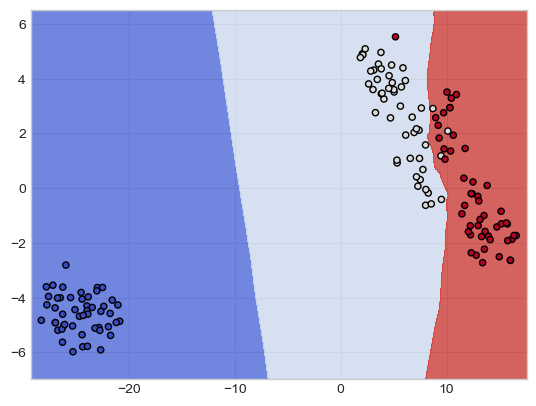

In [49]:
xx, yy = make_meshgrid(X_comp[:, 0], X_comp[:, 1])
plot_contours(model, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')

In [59]:
xx.ravel()

array([-29.2643795, -29.2443795, -29.2243795, ...,  17.5356205,
        17.5556205,  17.5756205])

In [60]:
xx.flatten()

array([-29.2643795, -29.2443795, -29.2243795, ...,  17.5356205,
        17.5556205,  17.5756205])

## k 최근접 이웃 회귀

* k 최근접 이웃 분류와 마찬가지로 예측에 이웃 데이터 포인트 사용
* 이웃 데이터 포인트의 평균이 예측 결과

### 캘리포니아 주택 가격 데이터

In [61]:
X, y = fetch_california_housing(return_X_y=True)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2)

In [62]:
model = KNeighborsRegressor()
model.fit(X_train, y_train)
print(model.score(X_train, y_train))
print(model.score(X_test, y_test))

0.44343672076349494
0.16135632025951163


In [63]:
pipe = Pipeline([
    ('scaler', StandardScaler()),
    ('model', KNeighborsRegressor())
])

pipe.fit(X_train, y_train)
print(pipe.score(X_train, y_train))
print(pipe.score(X_test, y_test))

0.7913235996237735
0.6918255343980539


In [65]:
param_grid = [
    {
        "model__n_neighbors": [3, 5, 7],
        "model__weights": ["uniform", "distance"],
        "model__algorithm": ["ball_tree", "kd_tree", "brute"],
    }
]

gs = GridSearchCV(estimator=pipe, param_grid=param_grid)
gs.fit(X_train, y_train)

GridSearchCV(estimator=Pipeline(steps=[('scaler', StandardScaler()),
                                       ('model', KNeighborsRegressor())]),
             param_grid=[{'model__algorithm': ['ball_tree', 'kd_tree', 'brute'],
                          'model__n_neighbors': [3, 5, 7],
                          'model__weights': ['uniform', 'distance']}])

In [68]:
gs.best_score_

0.6946862639471022

In [69]:
gs.best_params_

{'model__algorithm': 'ball_tree',
 'model__n_neighbors': 7,
 'model__weights': 'distance'}

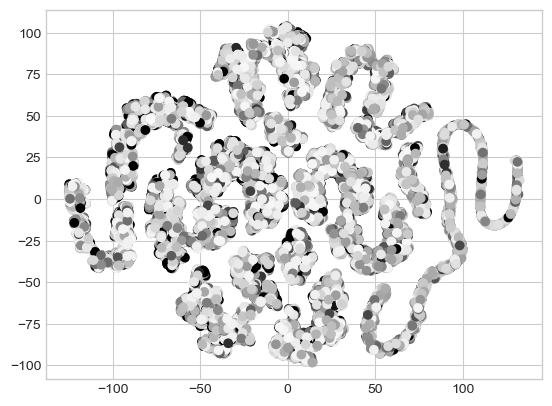

In [70]:
tsne = TSNE(n_components=2)
X_comp = tsne.fit_transform(X)
plt.scatter(X_comp[:, 0], X_comp[:, 1], c=y)